Simulation with inner regions:

<IPython.core.display.Javascript object>


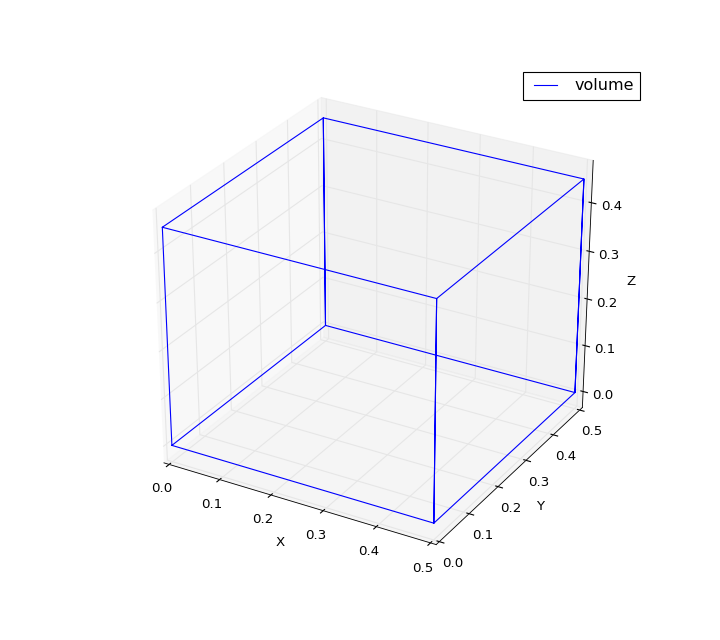

In [12]:
%matplotlib notebook  

from ef_jupyter_visualize import *

efconf = EfConf()

time_grid = TimeGrid(
    total_time = 5.0e-10,
    time_save_step = 5.0e-11,
    time_step_size = 5.0e-11,
)

spat_mesh = SpatialMesh(
    grid_x_size = 0.5,
    grid_x_step = 0.05,
    grid_y_size = 0.5,
    grid_y_step = 0.05,
    grid_z_size = 0.45,
    grid_z_step = 0.05
)

efconf.time_grid = time_grid
efconf.spatial_mesh = spat_mesh
efconf.visualize()

<IPython.core.display.Javascript object>


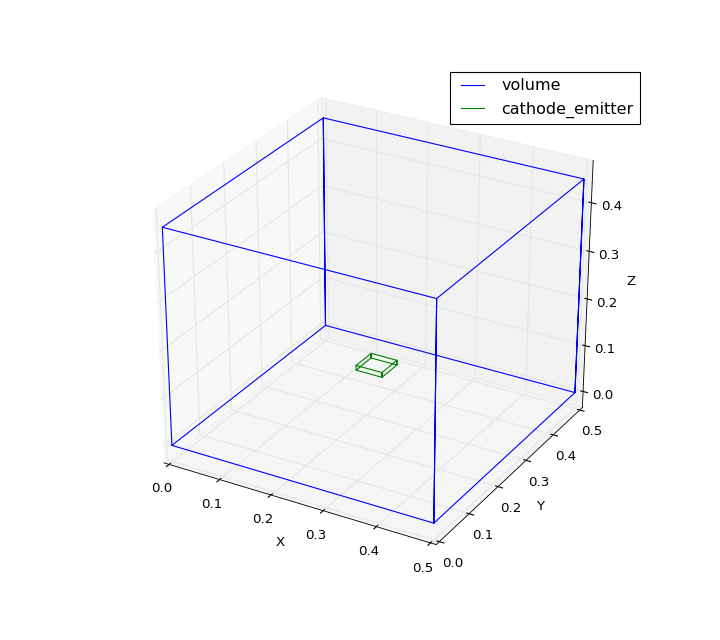

In [13]:
box_src = ParticleSourceBox( 
    name = 'cathode_emitter',
    initial_number_of_particles = 300,
    particles_to_generate_each_step = 300,
    box_x_left = 0.225,
    box_x_right = 0.275,
    box_y_bottom = 0.225,
    box_y_top = 0.275,
    box_z_near = 0.11,
    box_z_far = 0.12,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = 9.5e-17,
    temperature = 0.0,
    charge = -1.5e-07,
    mass = 2.8e-25 )
efconf.add_source( box_src )
efconf.visualize()

<IPython.core.display.Javascript object>


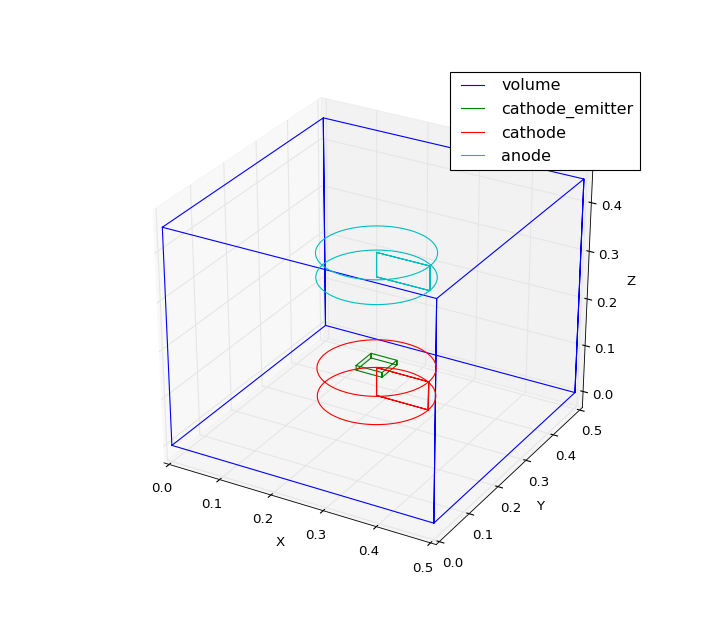

In [14]:
cathode = InnerRegionTubeAlongZSegment( 
    name = 'cathode',
    potential = 0.0,
    tube_segment_axis_x = 0.25, 
    tube_segment_axis_y = 0.25,
    tube_segment_axis_start_z = 0.05, 
    tube_segment_axis_end_z = 0.11,
    tube_segment_inner_radius = 0.0, 
    tube_segment_outer_radius = 0.1,
    tube_segment_start_angle_deg = 0, 
    tube_segment_end_angle_deg = 360 )
efconf.add_source( cathode )

anode = InnerRegionTubeAlongZSegment( 
    name = 'anode',
    potential = 3.36,
    tube_segment_axis_x = 0.25, 
    tube_segment_axis_y = 0.25,
    tube_segment_axis_start_z = 0.3, 
    tube_segment_axis_end_z = 0.35,
    tube_segment_inner_radius = 0.0, 
    tube_segment_outer_radius = 0.1,
    tube_segment_start_angle_deg = 0, 
    tube_segment_end_angle_deg = 360 )
efconf.add_source( anode )

efconf.visualize()

In [4]:
efconf.print_config()

[Particle_source_box.cathode_emitter]
temperature  =  0.0
mean_momentum_x  =  0
box_y_bottom  =  0.225
box_x_left  =  0.225
box_y_top  =  0.275
box_z_far  =  0.12
charge  =  -1.5e-07
mean_momentum_y  =  0
box_x_right  =  0.275
mean_momentum_z  =  9.5e-17
particles_to_generate_each_step  =  300
initial_number_of_particles  =  300
box_z_near  =  0.11
mass  =  2.8e-25

[Boundary conditions]
boundary_phi_near  =  0
boundary_phi_left  =  0
boundary_phi_far  =  0
boundary_phi_right  =  0
boundary_phi_top  =  0
boundary_phi_bottom  =  0

[Inner_region_tube_along_z_segment.anode]
tube_segment_axis_y  =  0.25
tube_segment_axis_start_z  =  0.3
tube_segment_outer_radius  =  0.1
tube_segment_inner_radius  =  0.0
tube_segment_axis_end_z  =  0.35
potential  =  3.36
tube_segment_axis_x  =  0.25
tube_segment_end_angle_deg  =  360
tube_segment_start_angle_deg  =  0

[Time grid]
time_save_step  =  5e-11
time_step_size  =  5e-11
total_time  =  5e-10

[Output filename]
output_filename_suffix  =  .h5
outpu

In [5]:
efconf.run()

command: python3 ../../main.py /tmp/tmpbxvlpoj4.ini
b'field-solver: inner regions support is experimental'
b'keep eye on anode'
b'keep eye on cathode'
b'1210 1210'
b'Writing step 0 to file out_0000000.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 300'
b'Time step from 0 to 1 of 10'
b'Writing step 1 to file out_0000001.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 600'
b'Time step from 1 to 2 of 10'
b'Writing step 2 to file out_0000002.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 900'
b'Time step from 2 to 3 of 10'
b'Writing step 3 to file out_0000003.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1200'
b'Time step from 3 to 4 of 10'
b'Writing step 4 to file out_0000004.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1469'
b'Time step from 4 to 5 of 10'
b'Writing step 5 to file out_0000005.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


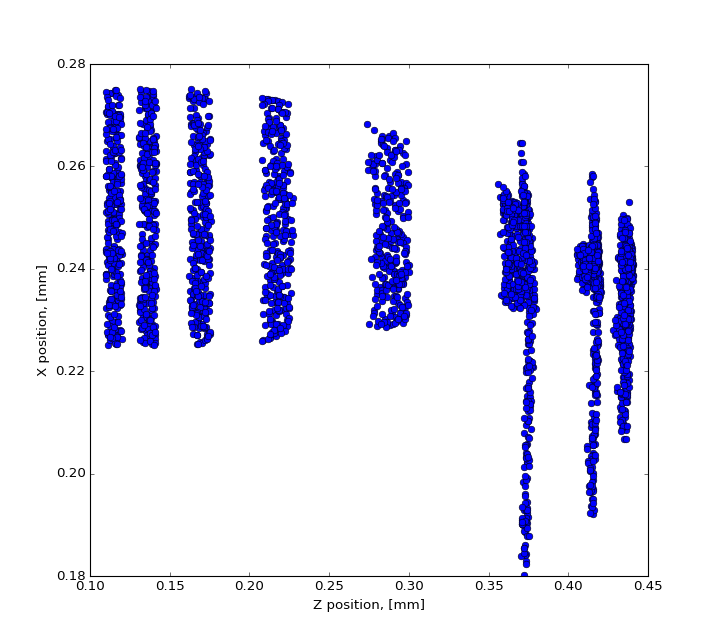

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.close()
plt.close()
plt.close()
filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file
plt.xlabel("Z position, [mm]")
plt.ylabel("X position, [mm]")
plt.plot(h5["/Particle_sources/cathode_emitter/position_z"][:],
         h5["/Particle_sources/cathode_emitter/position_x"][:],'o')
plt.savefig('plot.png')

<IPython.core.display.Javascript object>


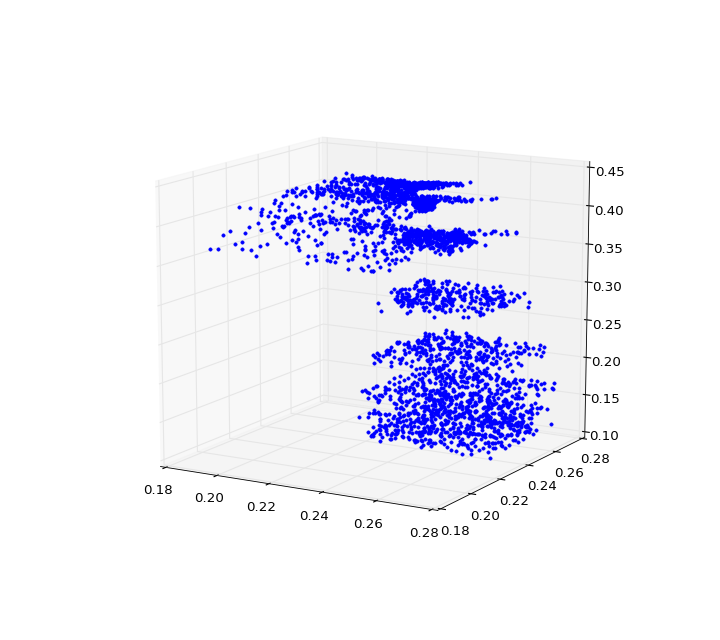

In [15]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file

ax.plot(h5["/Particle_sources/cathode_emitter/position_x"][:],
         h5["/Particle_sources/cathode_emitter/position_y"][:],
h5["/Particle_sources/cathode_emitter/position_z"][:],'.')

Simulation without inner region, but with external field

In [16]:
%matplotlib notebook  

from ef_jupyter_visualize import *

efconf2 = EfConf()

time_grid = TimeGrid(
    total_time = 5.0e-10,
    time_save_step = 5.0e-11,
    time_step_size = 5.0e-11,
)

spat_mesh = SpatialMesh(
    grid_x_size = 0.5,
    grid_x_step = 0.05,
    grid_y_size = 0.5,
    grid_y_step = 0.05,
    grid_z_size = 0.45,
    grid_z_step = 0.05
)

ex_field = ExternalFieldElectricOnRegularGridFromH5File(name = 'elec_file', 
                                                        filename='out_0000000.h5')
#efconf2.output_filename_prefix = 'out_file_'
out_file = OutputFile( output_filename_prefix = "out_file_", output_filename_suffix = ".h5")
efconf2.output_file = out_file
efconf2.time_grid = time_grid
efconf2.spatial_mesh = spat_mesh
efconf2.add_ex_field( ex_field )
#efconf2.visualize()

In [17]:
box_src = ParticleSourceBox( 
    name = 'cathode_emitter',
    initial_number_of_particles = 300,
    particles_to_generate_each_step = 300,
    box_x_left = 0.225,
    box_x_right = 0.275,
    box_y_bottom = 0.225,
    box_y_top = 0.275,
    box_z_near = 0.11,
    box_z_far = 0.12,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = 9.5e-17,
    temperature = 0.0,
    charge = -1.5e-07,
    mass = 2.8e-25 )
efconf2.add_source( box_src )
#efconf2.visualize()

In [18]:
efconf2.print_config()

[Particle_source_box.cathode_emitter]
temperature  =  0.0
mean_momentum_x  =  0
box_y_bottom  =  0.225
box_x_left  =  0.225
box_y_top  =  0.275
box_z_far  =  0.12
charge  =  -1.5e-07
mean_momentum_y  =  0
box_x_right  =  0.275
mean_momentum_z  =  9.5e-17
particles_to_generate_each_step  =  300
initial_number_of_particles  =  300
box_z_near  =  0.11
mass  =  2.8e-25

[Boundary conditions]
boundary_phi_near  =  0
boundary_phi_left  =  0
boundary_phi_far  =  0
boundary_phi_right  =  0
boundary_phi_top  =  0
boundary_phi_bottom  =  0

[Time grid]
time_save_step  =  5e-11
time_step_size  =  5e-11
total_time  =  5e-10

[ExternalFieldElectricOnRegularGridFromH5File.elec_file]
filename  =  out_0000000.h5

[Particle interaction model]
particle_interaction_model  =  PIC

[Spatial mesh]
grid_z_step  =  0.05
grid_x_size  =  0.5
grid_x_step  =  0.05
grid_y_step  =  0.05
grid_y_size  =  0.5
grid_z_size  =  0.45

[Output filename]
output_filename_suffix  =  .h5
output_filename_prefix  =  out_file_



In [19]:
efconf2.run()

command: python3 ../../main.py /tmp/tmpyti6an0p.ini
b'1210 1210'
b'Writing step 0 to file out_file_0000000.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 300'
b'Time step from 0 to 1 of 10'
b'Writing step 1 to file out_file_0000001.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 600'
b'Time step from 1 to 2 of 10'
b'Writing step 2 to file out_file_0000002.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 900'
b'Time step from 2 to 3 of 10'
b'Writing step 3 to file out_file_0000003.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1200'
b'Time step from 3 to 4 of 10'
b'Writing step 4 to file out_file_0000004.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1500'
b'Time step from 4 to 5 of 10'
b'Writing step 5 to file out_file_0000005.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1800'
b'Time step from 5 to 6 of 10'
b'Writing step 6 to file out_fil

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


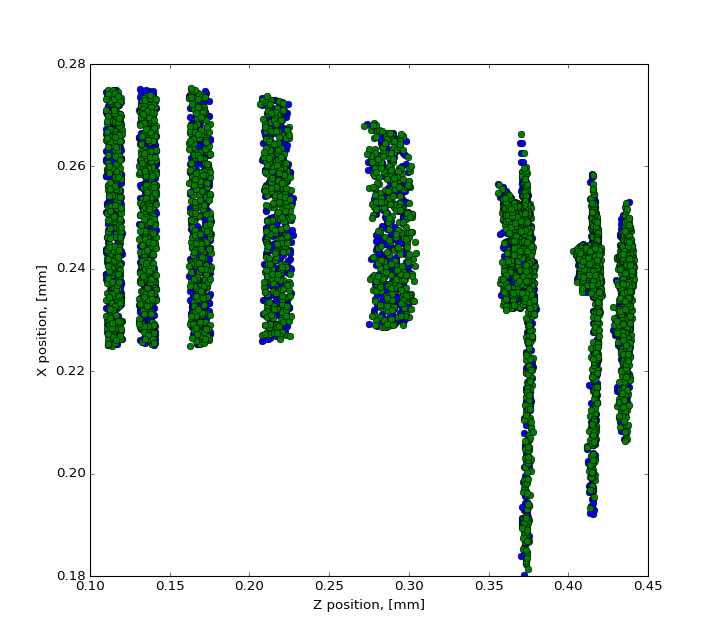

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.close()
filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file
plt.xlabel("Z position, [mm]")
plt.ylabel("X position, [mm]")
filename = 'out_file_0000010.h5'
h5_file = h5py.File( filename , mode="r") # read h5 file
plt.plot(h5["/Particle_sources/cathode_emitter/position_z"][:],
         h5["/Particle_sources/cathode_emitter/position_x"][:],
         'o',
         h5_file["/Particle_sources/cathode_emitter/position_z"][:],
         h5_file["/Particle_sources/cathode_emitter/position_x"][:],
             'o') #plot particles
plt.savefig('plot.png')

<IPython.core.display.Javascript object>


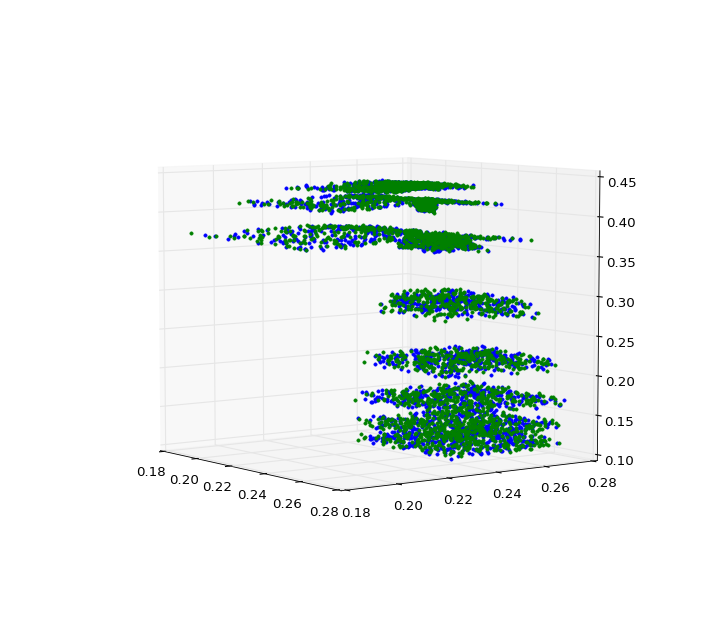

In [23]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file
filename = 'out_file_0000010.h5'
h5_file = h5py.File( filename , mode="r") # read h5 file

ax.plot(h5["/Particle_sources/cathode_emitter/position_x"][:],
         h5["/Particle_sources/cathode_emitter/position_y"][:],
h5["/Particle_sources/cathode_emitter/position_z"][:],'.')
ax.plot(h5_file["/Particle_sources/cathode_emitter/position_x"][:],
         h5_file["/Particle_sources/cathode_emitter/position_y"][:],
h5_file["/Particle_sources/cathode_emitter/position_z"][:],'.')

#plt.show()